<a href="https://colab.research.google.com/github/yolitie/Deep-Learning/blob/main/Pytorchpabatos3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Backpropagation
#Chain rule, we have two operations or two functions. First, we have an input x and we apply a function and our output is y, and we apply another function and we have as an output z.
#We want to obtain the minimum possible value of z.
# In order to obtain dz/dx=dz/dy*dy/dx
# 3 steps: 1) Forward pass: compute the loss.
#          2) Compute local gradients.
#          3) Backward pass: Compute dLoss/dWeihts using the chain rule.
# yap= w*x         loss=(yap-y)^2= (wx-y)^2

import torch

x= torch.tensor(1.0)
y= torch.tensor(2.0)

w= torch.tensor(1.0, requires_grad=True) #We are interested in the gradient so we have to specify requires_grad=True

#Forward pass and compute the loss
y_hat=x*w
loss= (y_hat-y)**2
print(loss)

#Backward pass

loss.backward()
print(w.grad)

### update our weights 
### next forward and backwards


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [ ]:
import numpy as np

# f= w*x

# f= 2*x
X= np.array([1,2,3,4],dtype=np.float32)
Y= np.array([2,4,6,8], dtype=np.float32)

w=0.0

#Calculate our model prediction
def forward(x):
  return w*x

#Calculate the loss, calculating it as the MSE
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

#Calculate the gradient
#MSE =1/N*(w*x-y)**2
#dJ/dw=1/N*2x(wx-y)
def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()

print(f'Prediction before trainin: f(5)={forward(5):.3f}')

#Training
learning_rate=0.01
n_iters=20

for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=forward(X)

  #loss 
  l= loss(Y,y_pred)

  #gradients
  dw=gradient(X,Y,y_pred)

  #update weights
  w -= learning_rate*dw

  if epoch % 2==0:
    print(f'epoch {epoch+1}: w= {w:.3f}, loss= {l:.8f}')
  
  print(f'Prediction after the training: f(5)= {forward(5):.3f}')


Prediction before trainin: f(5)=0.000
epoch 1: w= 1.200, loss= 30.00000000
Prediction after the training: f(5)= 6.000
Prediction after the training: f(5)= 8.400
epoch 3: w= 1.872, loss= 0.76800019
Prediction after the training: f(5)= 9.360
Prediction after the training: f(5)= 9.744
epoch 5: w= 1.980, loss= 0.01966083
Prediction after the training: f(5)= 9.898
Prediction after the training: f(5)= 9.959
epoch 7: w= 1.997, loss= 0.00050331
Prediction after the training: f(5)= 9.984
Prediction after the training: f(5)= 9.993
epoch 9: w= 1.999, loss= 0.00001288
Prediction after the training: f(5)= 9.997
Prediction after the training: f(5)= 9.999
epoch 11: w= 2.000, loss= 0.00000033
Prediction after the training: f(5)= 10.000
Prediction after the training: f(5)= 10.000
epoch 13: w= 2.000, loss= 0.00000001
Prediction after the training: f(5)= 10.000
Prediction after the training: f(5)= 10.000
epoch 15: w= 2.000, loss= 0.00000000
Prediction after the training: f(5)= 10.000
Prediction after the

In [ ]:
import torch 

# f= w*x

# f= 2*x
X= torch.tensor([1,2,3,4],dtype=torch.float32)
Y= torch.tensor([2,4,6,8], dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32, requires_grad= True )

#Calculate our model prediction
def forward(x):
  return w*x

#Calculate the loss, calculating it as the MSE
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()



print(f'Prediction before trainin: f(5)={forward(5):.3f}')

#Training
learning_rate=0.01
n_iters=100

for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=forward(X)

  #loss 
  l= loss(Y,y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  #update weights
  with torch.no_grad():
    w -= learning_rate*w.grad
  #zero gradients 
  w.grad.zero_()


  if epoch % 10==0:
    print(f'epoch {epoch+1}: w= {w:.3f}, loss= {l:.8f}')
  
print(f'Prediction after the training: f(5)= {forward(5):.3f}')


Prediction before trainin: f(5)=0.000
epoch 1: w= 0.300, loss= 30.00000000
epoch 11: w= 1.665, loss= 1.16278565
epoch 21: w= 1.934, loss= 0.04506890
epoch 31: w= 1.987, loss= 0.00174685
epoch 41: w= 1.997, loss= 0.00006770
epoch 51: w= 1.999, loss= 0.00000262
epoch 61: w= 2.000, loss= 0.00000010
epoch 71: w= 2.000, loss= 0.00000000
epoch 81: w= 2.000, loss= 0.00000000
epoch 91: w= 2.000, loss= 0.00000000
Prediction after the training: f(5)= 10.000


In [ ]:
#1) Design our model (input, output size, forward pass)
#2) Construct loss and optimizer.
#3) Training loop.
#    -Forward pass: Compute prediction.
#    -Backward pass: gradients.
#    -Update weights.

import torch 
import torch.nn as nn

# f= w*x

# f= 2*x
X= torch.tensor([1,2,3,4],dtype=torch.float32)
Y= torch.tensor([2,4,6,8], dtype=torch.float32)

w=torch.tensor(0.0,dtype=torch.float32, requires_grad= True )

#Calculate our model prediction
def forward(x):
  return w*x

print(f'Prediction before trainin: f(5)={forward(5):.3f}')

#Training
learning_rate=0.01
n_iters=100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=learning_rate)
#SGD stands for Stochastic gradient descent
for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=forward(X)

  #loss 
  l= loss(Y,y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  #We don´t need to manually update our weights
  optimizer.step()
  #W still have to empty our gradients after the optimization step, zero gradients 
  optimizer.zero_grad()


  if epoch % 10==0:
    print(f'epoch {epoch+1}: w= {w:.3f}, loss= {l:.8f}')
  
print(f'Prediction after the training: f(5)= {forward(5):.3f}')


Prediction before trainin: f(5)=0.000
epoch 1: w= 0.300, loss= 30.00000000
epoch 11: w= 1.665, loss= 1.16278565
epoch 21: w= 1.934, loss= 0.04506890
epoch 31: w= 1.987, loss= 0.00174685
epoch 41: w= 1.997, loss= 0.00006770
epoch 51: w= 1.999, loss= 0.00000262
epoch 61: w= 2.000, loss= 0.00000010
epoch 71: w= 2.000, loss= 0.00000000
epoch 81: w= 2.000, loss= 0.00000000
epoch 91: w= 2.000, loss= 0.00000000
Prediction after the training: f(5)= 10.000


In [ ]:
#STEP 4


In [ ]:

import torch 
import torch.nn as nn

# f= w*x

# f= 2*x
X= torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y= torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test= torch.tensor([5], dtype= torch.float32)

n_samples, n_features= X.shape
print( n_samples, n_features)

input_size= n_features
output_size= n_features

model=nn.Linear(input_size, output_size)
#This is only one layer, it needs an input size and output size of our features.
#Now or X and Y need both a different shape, it has to be a 2D array with the number of rows as the number of samples and for each row we have the number of features.

print(f'Prediction before trainin: f(5)={model(X_test).item():.3f}')

#Training
learning_rate=0.01
n_iters=100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
#SGD stands for Stochastic gradient descent
for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=model(X)

  #loss 
  l= loss(Y,y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  #We don´t need to manually update our weights
  optimizer.step()
  #W still have to empty our gradients after the optimization step, zero gradients 
  optimizer.zero_grad()


  if epoch % 10==0:
    [w,b]= model.parameters()
    print(f'epoch {epoch+1}: w= {w[0][0].item():.3f}, loss= {l:.8f}')
  
print(f'Prediction after the training: f(5)= {model(X_test).item():.3f}')


4 1
Prediction before trainin: f(5)=4.316
epoch 1: w= 1.078, loss= 10.16656590
epoch 11: w= 1.810, loss= 0.26658076
epoch 21: w= 1.929, loss= 0.01023797
epoch 31: w= 1.949, loss= 0.00341124
epoch 41: w= 1.954, loss= 0.00305149
epoch 51: w= 1.955, loss= 0.00286971
epoch 61: w= 1.957, loss= 0.00270258
epoch 71: w= 1.958, loss= 0.00254526
epoch 81: w= 1.959, loss= 0.00239711
epoch 91: w= 1.961, loss= 0.00225759
Prediction after the training: f(5)= 9.921


In [ ]:

import torch 
import torch.nn as nn

# f= w*x

# f= 2*x
X= torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y= torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test= torch.tensor([5], dtype= torch.float32)

n_samples, n_features= X.shape
print( n_samples, n_features)

input_size= n_features
output_size= n_features


class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression,self).__init__()
    #define our layers
    self.lin= nn.Linear(input_dim,output_dim)
  
  def forward(self,x):
    return self.lin(x)

model=LinearRegression(input_size, output_size)


#Now or X and Y need both a different shape, it has to be a 2D array with the number of rows as the number of samples and for each row we have the number of features.

print(f'Prediction before trainin: f(5)={model(X_test).item():.3f}')

#Training
learning_rate=0.01
n_iters=100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
#SGD stands for Stochastic gradient descent
for epoch in range(n_iters):
  #prediction= forward pass
  y_pred=model(X)

  #loss 
  l= loss(Y,y_pred)

  #gradients = backward pass
  l.backward() #dl/dw

  #We don´t need to manually update our weights
  optimizer.step()
  #W still have to empty our gradients after the optimization step, zero gradients 
  optimizer.zero_grad()


  if epoch % 10==0:
    [w,b]= model.parameters()
    print(f'epoch {epoch+1}: w= {w[0][0].item():.3f}, loss= {l:.8f}')
  
print(f'Prediction after the training: f(5)= {model(X_test).item():.3f}')


4 1
Prediction before trainin: f(5)=-2.279
epoch 1: w= 0.031, loss= 47.96054840
epoch 11: w= 1.619, loss= 1.24921679
epoch 21: w= 1.876, loss= 0.04019616
epoch 31: w= 1.920, loss= 0.00845763
epoch 41: w= 1.928, loss= 0.00720477
epoch 51: w= 1.932, loss= 0.00676574
epoch 61: w= 1.934, loss= 0.00637142
epoch 71: w= 1.936, loss= 0.00600055
epoch 81: w= 1.938, loss= 0.00565128
epoch 91: w= 1.939, loss= 0.00532235
Prediction after the training: f(5)= 9.879


epoch: 10, loss =4287.8638
epoch: 20, loss =3201.4875
epoch: 30, loss =2415.3369
epoch: 40, loss =1845.8413
epoch: 50, loss =1432.8875
epoch: 60, loss =1133.1753
epoch: 70, loss =915.4694
epoch: 80, loss =757.2095
epoch: 90, loss =642.0818
epoch: 100, loss =558.2772


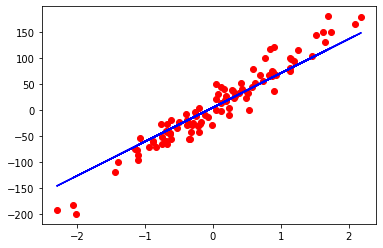

In [ ]:
#LINEAR REGRESSION 

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt

# 0) prepare our data
X_numpy, y_numpy= datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X= torch.from_numpy(X_numpy.astype(np.float32))
y= torch.from_numpy(y_numpy.astype(np.float32))
y=y.view(y.shape[0],1)
n_samples, n_features = X.shape


# 1) model
input_size= n_features
output_size= 1
model= nn.Linear(input_size, output_size)

# 2) define the loss and optimizer 
learning_rate= 0.01
criterion= nn.MSELoss()
optimizer= torch.optim.SGD(model.parameters(),lr= learning_rate)

# 3) training loop
num_epochs= 100
for epoch in range(num_epochs):
   #forward pass and loss
   y_predicted= model(X)
   loss=criterion(y_predicted,y)

   #backward pass
   loss.backward()

   #update
   optimizer.step()

   #empty our gradients
   optimizer.zero_grad()

   if (epoch+1) %10==0:
     print(f'epoch: {epoch+1}, loss ={loss.item():.4f}')

#plot
predicted= model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()





In [ ]:
#LOGISTIC REGESSION

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#0) Prepare data

bc=datasets.load_breast_cancer()
# Binary classification problem where we can predict cancer based on the input features.
X,y= bc.data, bc.target

n_samples, n_features= X.shape
print(n_samples, n_features)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1234)

#scale our features
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

X_train= torch.from_numpy(X_train.astype(np.float32))
X_test= torch.from_numpy(X_test.astype(np.float32))
y_train= torch.from_numpy(y_train.astype(np.float32))
y_test= torch.from_numpy(y_test.astype(np.float32))

y_train=y_train.view(y_train.shape[0],1)
y_test= y_test.view(y_test.shape[0],1)

#1) Model
# f=wx+b, sigmoid at the end
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear= nn.Linear(n_input_features,1)

  def forward(self, x):
    y_predicted= torch.sigmoid(self.linear(x))
    return y_predicted

model=LogisticRegression(n_features)

#2) loss and optimizer
learning_rate=0.01
criterion= nn.BCELoss()
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)

#3) training loop
num_epochs= 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted= model(X_train)
  loss=criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch:{epoch+1},loss={loss.item():.4f}')

with torch.no_grad():
  y_predicted=model(X_test)
  y_predicted_cls= y_predicted.round()
  acc= y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy: {acc:.4f}')

  






569 30
epoch:10,loss=0.6167
epoch:20,loss=0.4969
epoch:30,loss=0.4238
epoch:40,loss=0.3746
epoch:50,loss=0.3390
epoch:60,loss=0.3118
epoch:70,loss=0.2902
epoch:80,loss=0.2726
epoch:90,loss=0.2579
epoch:100,loss=0.2454
accuracy: 0.9035
